In [8]:
import pandas as pd

path = '/Users/vladimirkuzmin/Downloads/all_matches_results.xlsx'
df = pd.read_excel(path)
print(df.info())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6556 entries, 0 to 6555
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   data                  6556 non-null   object
 1   team1                 6556 non-null   object
 2   team2                 6556 non-null   object
 3   goals_team1           6556 non-null   object
 4   goals_team2           6556 non-null   object
 5   match_status          6556 non-null   object
 6   predict_team1         6556 non-null   object
 7   predict_team2         6556 non-null   object
 8   team_1_strikes        6556 non-null   int64 
 9   team_1_trows          6556 non-null   int64 
 10  team_1_block_strikes  6556 non-null   int64 
 11  team_1_strong         6556 non-null   int64 
 12  team_1_penalty        6556 non-null   int64 
 13  team_2_strikes        6556 non-null   int64 
 14  team_2_trows          6556 non-null   int64 
 15  team_2_block_strikes  6556 non-null   

In [ ]:
import locale
import pandas as pd

try:
    locale.setlocale(locale.LC_TIME, 'ru_RU.UTF-8')
except locale.Error:
    try:
        locale.setlocale(locale.LC_TIME, 'Russian_Russia.1251')
    except locale.Error:
        print("Не удалось установить русскую локаль, используем альтернативный метод")

df['date'] = pd.to_datetime(df['data'], format='%d %B %Y, %A. %H:%M МСК', errors='coerce')

df['team1_result'] = df.apply(
    lambda x: 'win' if x['goals_team1'] > x['goals_team2'] else 'loss',
    axis=1
)

df['team1_win'] = (df['goals_team1'] > df['goals_team2']).astype(int)

df['strikes_diff'] = df['team_1_strikes'] - df['team_2_strikes']
df['strong_diff'] = df['team_1_strong'] - df['team_2_strong']
df['penalty_diff'] = df['team_1_penalty'] - df['team_2_penalty']

df['team1_strike_pct'] = df['team_1_strikes'] / (df['team_1_strikes'] + df['team_2_strikes'])

df['is_overtime'] = (df['match_status'] == 'ОТ').astype(int)
df['is_bull'] = (df['match_status'] == 'Б').astype(int)

df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek
df['hour'] = df['date'].dt.hour

print(df.head())

                                      data          team1       team2  \
0  21 августа 2017, понедельник. 19:30 МСК            СКА        ЦСКА   
1      22 августа 2017, вторник. 15:30 МСК         Сибирь     Спартак   
2      22 августа 2017, вторник. 16:00 МСК       Авангард    Динамо Р   
3      22 августа 2017, вторник. 17:00 МСК  Салават Юлаев     Адмирал   
4      22 августа 2017, вторник. 17:00 МСК           Югра  Северсталь   

  goals_team1 goals_team2 match_status predict_team1 predict_team2  \
0           4           2            0             0             0   
1           3           1            0             0             0   
2           3           1            0             0             0   
3           3           1            0             0             0   
4           2           1           ОТ             0             0   

   team_1_strikes  team_1_trows  ...  team1_win  strikes_diff  strong_diff  \
0              20            33  ...          1           -10 

In [ ]:
print("Информация о датасете:")
print(df.info())
print("\nПервые 5 строк:")
print(df.head())

print("\nПропущенные значения:")
print(df.isnull().sum())

print("\nУникальные команды team1:")
print(df['team1'].unique()[:10]) 
print(f"Всего уникальных команд: {df['team1'].nunique()}")

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6556 entries, 0 to 6555
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   data                  6556 non-null   object        
 1   team1                 6556 non-null   object        
 2   team2                 6556 non-null   object        
 3   goals_team1           6556 non-null   object        
 4   goals_team2           6556 non-null   object        
 5   match_status          6556 non-null   object        
 6   predict_team1         6556 non-null   object        
 7   predict_team2         6556 non-null   object        
 8   team_1_strikes        6556 non-null   int64         
 9   team_1_trows          6556 non-null   int64         
 10  team_1_block_strikes  6556 non-null   int64         
 11  team_1_strong         6556 non-null   int64         
 12  team_1_penalty        6556 non-null   int64         


In [ ]:
import numpy as np

def to_numeric(x):
    try:
        if isinstance(x, (int, float, np.integer, np.floating)):
            return float(x)
        elif isinstance(x, str):
            x_clean = x.strip()
            return float(x_clean)
        else:
            return np.nan
    except:
        return np.nan

numeric_columns = ['goals_team1', 'goals_team2', 'team_1_strikes', 'team_2_strikes',
                   'team_1_strong', 'team_2_strong', 'team_1_penalty', 'team_2_penalty']

for col in numeric_columns:
    if col in df.columns:
        print(f"\nПреобразование столбца {col}...")
        df[col] = df[col].apply(to_numeric)
        
        print(f"Успешно преобразовано: {df[col].notna().sum()} из {len(df)}")
        print(f"Пропусков: {df[col].isna().sum()}")
        print(f"Минимум: {df[col].min()}, Максимум: {df[col].max()}")


Преобразование столбца goals_team1...
Успешно преобразовано: 6554 из 6556
Пропусков: 2
Минимум: 0.0, Максимум: 9.0

Преобразование столбца goals_team2...
Успешно преобразовано: 6553 из 6556
Пропусков: 3
Минимум: 0.0, Максимум: 9.0

Преобразование столбца team_1_strikes...
Успешно преобразовано: 6556 из 6556
Пропусков: 0
Минимум: 0.0, Максимум: 84.0

Преобразование столбца team_2_strikes...
Успешно преобразовано: 6556 из 6556
Пропусков: 0
Минимум: 0.0, Максимум: 75.0

Преобразование столбца team_1_strong...
Успешно преобразовано: 6556 из 6556
Пропусков: 0
Минимум: 0.0, Максимум: 64.0

Преобразование столбца team_2_strong...
Успешно преобразовано: 6556 из 6556
Пропусков: 0
Минимум: 0.0, Максимум: 53.0

Преобразование столбца team_1_penalty...
Успешно преобразовано: 6556 из 6556
Пропусков: 0
Минимум: 0.0, Максимум: 188.0

Преобразование столбца team_2_penalty...
Успешно преобразовано: 6556 из 6556
Пропусков: 0
Минимум: 0.0, Максимум: 70.0


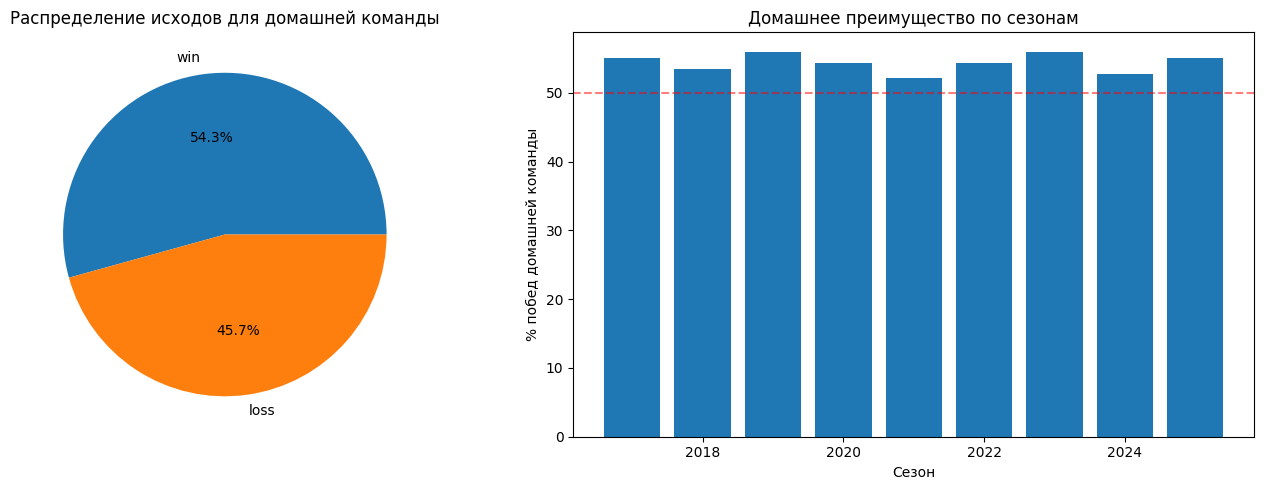


=== БАЗОВАЯ СТАТИСТИКА ===
Всего матчей: 6556
Матчей в овертайме: 933 (14.2%)
Общий процент побед домашней команды: 54.30%


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

result_counts = df['team1_result'].value_counts()
axes[0].pie(result_counts.values, labels=result_counts.index, autopct='%1.1f%%')
axes[0].set_title('Распределение исходов для домашней команды')

if 'date' in df.columns and df['date'].notna().any():
    df['season'] = df['date'].dt.year
    season_wins = df.groupby('season')['team1_win'].mean() * 100
    axes[1].bar(season_wins.index, season_wins.values)
    axes[1].set_xlabel('Сезон')
    axes[1].set_ylabel('% побед домашней команды')
    axes[1].set_title('Домашнее преимущество по сезонам')
    axes[1].axhline(y=50, color='r', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

print("\n=== БАЗОВАЯ СТАТИСТИКА ===")
print(f"Всего матчей: {len(df)}")
print(f"Матчей в овертайме: {df['is_overtime'].sum()} ({df['is_overtime'].mean()*100:.1f}%)")
print(f"Общий процент побед домашней команды: {df['team1_win'].mean()*100:.2f}%")



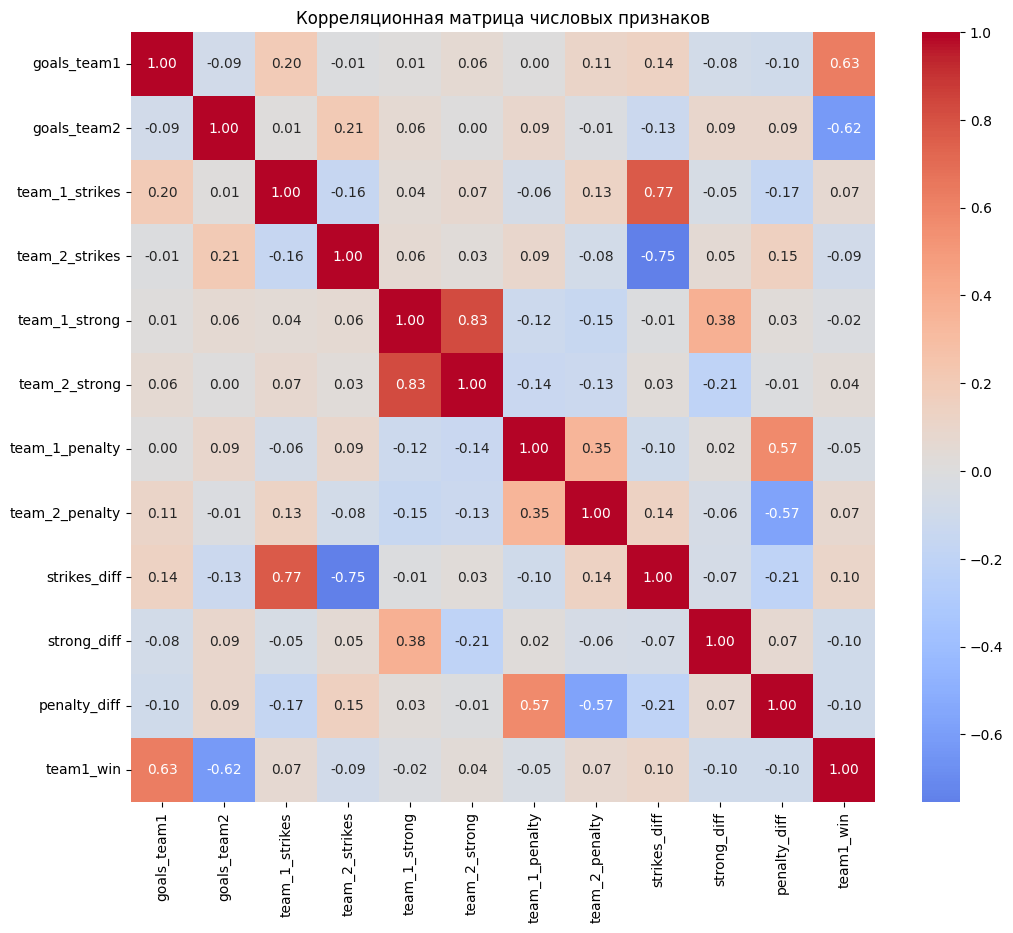


Корреляция признаков с победой домашней команды:
team1_win         1.000000
goals_team1       0.629010
strikes_diff      0.103691
team_2_penalty    0.069534
team_1_strikes    0.067534
team_2_strong     0.040419
team_1_strong    -0.019127
team_1_penalty   -0.045934
team_2_strikes   -0.090858
strong_diff      -0.099983
penalty_diff     -0.101111
goals_team2      -0.619552
Name: team1_win, dtype: float64


In [ ]:
numeric_features = [
    'goals_team1', 'goals_team2', 'team_1_strikes', 'team_2_strikes',
    'team_1_strong', 'team_2_strong', 'team_1_penalty', 'team_2_penalty',
    'strikes_diff', 'strong_diff', 'penalty_diff', 'team1_win'
]

corr_matrix = df[numeric_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Корреляционная матрица числовых признаков')
plt.show()

print("\nКорреляция признаков с победой домашней команды:")
win_corr = corr_matrix['team1_win'].sort_values(ascending=False)
print(win_corr)

=== СРАВНЕНИЕ СТАТИСТИК ===
Матчей с победами домашней команды: 3560
Матчей с поражениями домашней команды: 2996


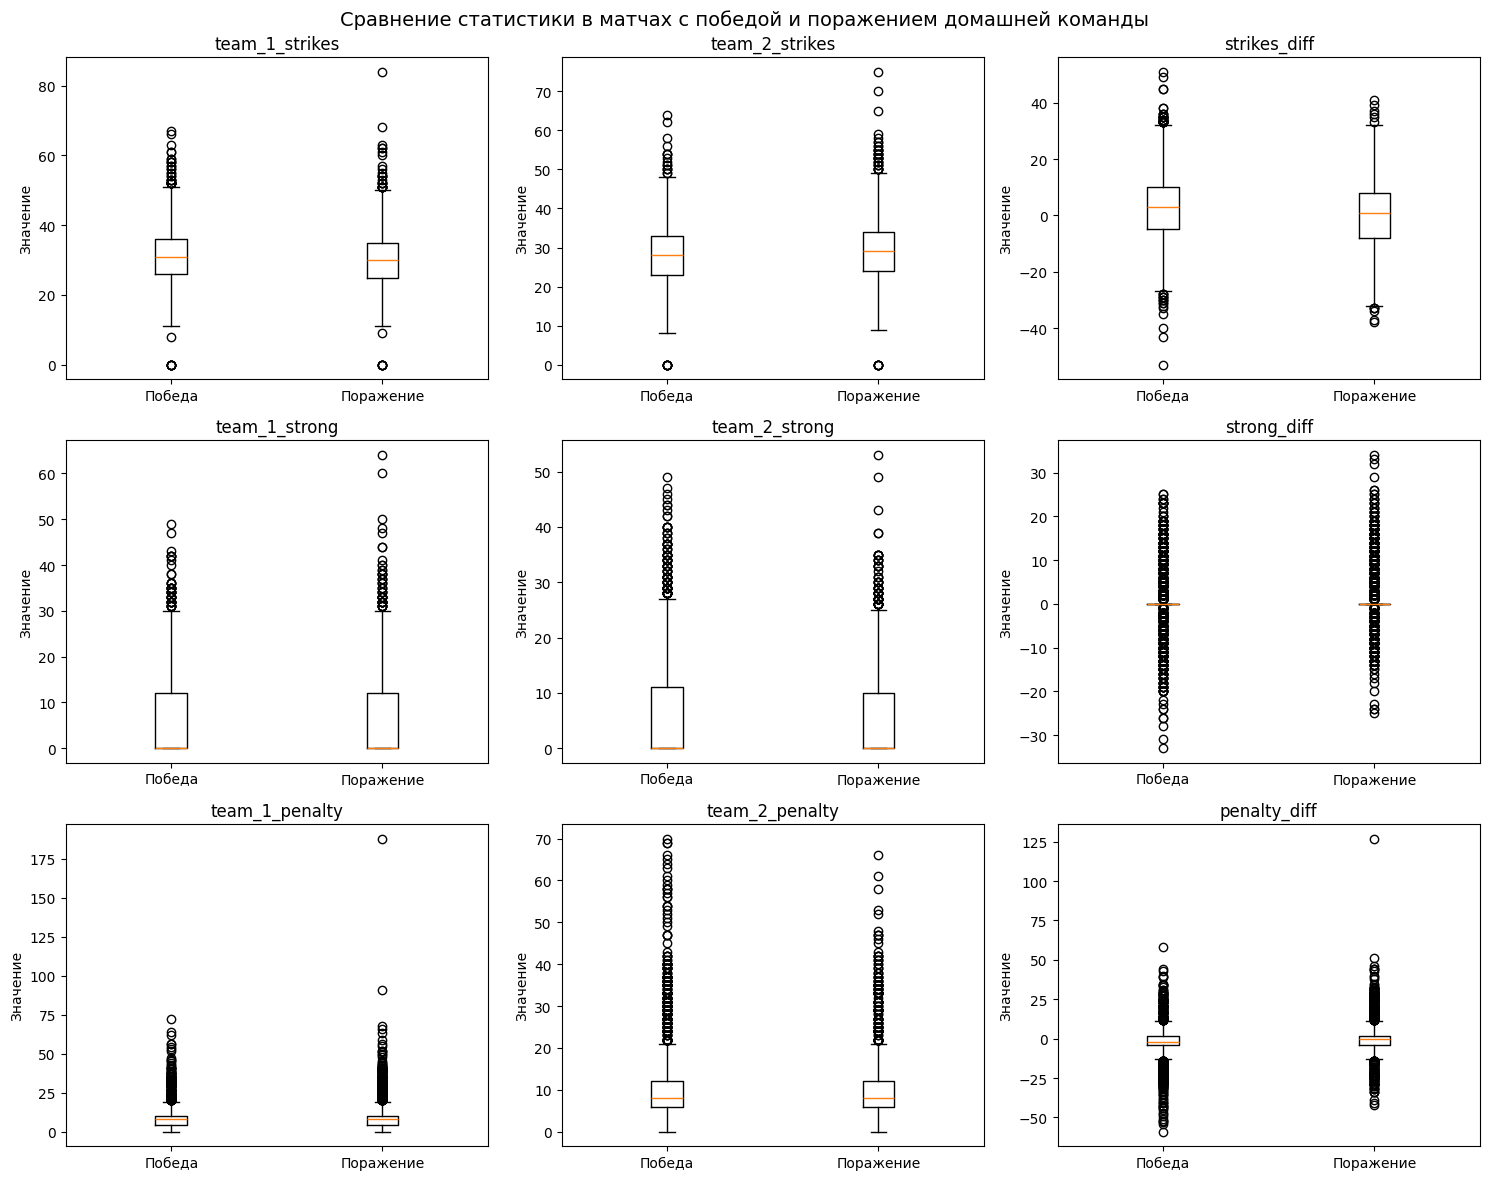


Средние значения показателей:
team_1_strikes: Победа=31.1, Поражение=30.1, Разница=1.1
team_2_strikes: Победа=28.3, Поражение=29.7, Разница=-1.4
strikes_diff: Победа=2.9, Поражение=0.4, Разница=2.4
team_1_strong: Победа=6.0, Поражение=6.3, Разница=-0.3
team_2_strong: Победа=6.0, Поражение=5.3, Разница=0.7
strong_diff: Победа=-0.0, Поражение=1.0, Разница=-1.0
team_1_penalty: Победа=8.7, Поражение=9.4, Разница=-0.7
team_2_penalty: Победа=10.4, Поражение=9.3, Разница=1.1
penalty_diff: Победа=-1.6, Поражение=0.1, Разница=-1.8


In [ ]:
wins = df[df['team1_win'] == 1]
losses = df[df['team1_win'] == 0]

print("=== СРАВНЕНИЕ СТАТИСТИК ===")
print(f"Матчей с победами домашней команды: {len(wins)}")
print(f"Матчей с поражениями домашней команды: {len(losses)}")

comparison_stats = ['team_1_strikes', 'team_2_strikes', 'strikes_diff',
                    'team_1_strong', 'team_2_strong', 'strong_diff',
                    'team_1_penalty', 'team_2_penalty', 'penalty_diff']

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, stat in enumerate(comparison_stats):
    axes[idx].boxplot([wins[stat].dropna(), losses[stat].dropna()], tick_labels=['Победа', 'Поражение'])
    axes[idx].set_title(f'{stat}')
    axes[idx].set_ylabel('Значение')

plt.suptitle('Сравнение статистики в матчах с победой и поражением домашней команды', fontsize=14)
plt.tight_layout()
plt.show()

print("\nСредние значения показателей:")
for stat in comparison_stats:
    win_mean = wins[stat].mean()
    loss_mean = losses[stat].mean()
    diff = win_mean - loss_mean
    print(f"{stat}: Победа={win_mean:.1f}, Поражение={loss_mean:.1f}, Разница={diff:.1f}")

Топ-10 команд по проценту побед дома:
           Команда  Домашние матчи  Победы дома  % побед дома  Средние голы дома  Средние броски дома
Шанхайские Драконы               4            3     75.000000           3.750000            28.750000
               СКА             306          212     69.281046           3.248366            32.722222
              ЦСКА             315          215     68.253968           3.050794            31.238095
           Ак Барс             301          199     66.112957           2.823920            31.026578
         Локомотив             297          195     65.656566           2.589226            33.505051
          Авангард             304          199     65.460526           2.976974            31.500000
      Металлург Мг             301          192     63.787375           2.940199            32.541528
     Салават Юлаев             292          184     63.013699           2.948630            30.729452
           Йокерит             156          

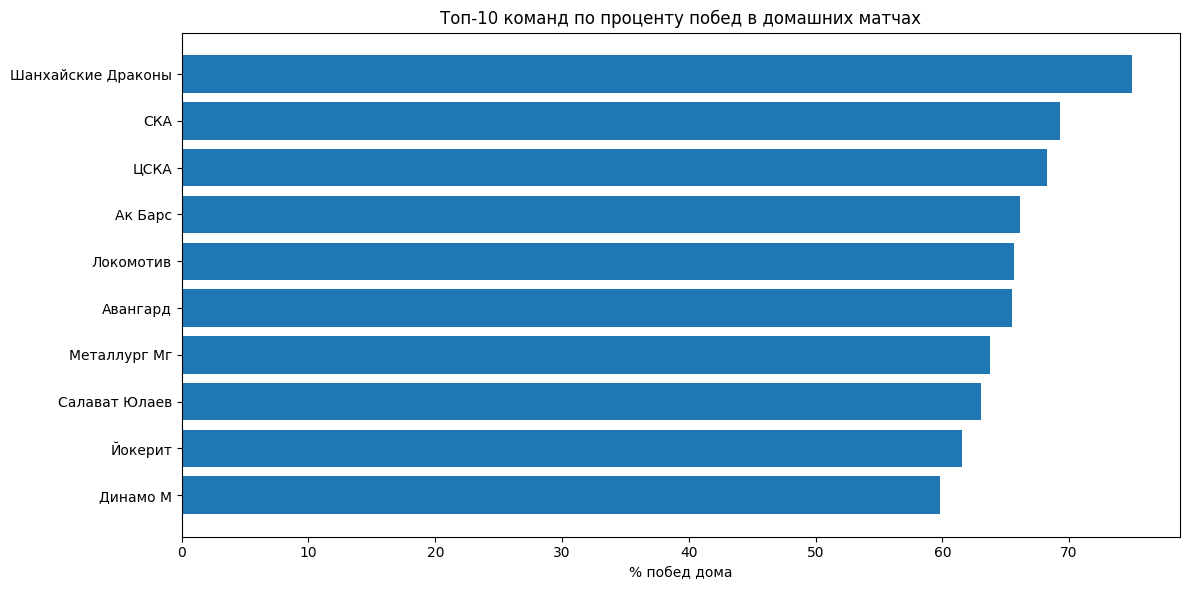

In [ ]:
team_stats = []

for team in df['team1'].unique():
    home_games = df[df['team1'] == team]
    away_games = df[df['team2'] == team]
    
    if len(home_games) > 0:
        home_wins = home_games['team1_win'].sum()
        home_win_pct = home_wins / len(home_games) * 100
        
        team_stats.append({
            'Команда': team,
            'Домашние матчи': len(home_games),
            'Победы дома': home_wins,
            '% побед дома': home_win_pct,
            'Средние голы дома': home_games['goals_team1'].mean(),
            'Средние броски дома': home_games['team_1_strikes'].mean()
        })

team_df = pd.DataFrame(team_stats)

team_df = team_df.sort_values('% побед дома', ascending=False)

print("Топ-10 команд по проценту побед дома:")
print(team_df.head(10).to_string(index=False))

plt.figure(figsize=(12, 6))
top_10 = team_df.head(10)
plt.barh(top_10['Команда'], top_10['% побед дома'])
plt.xlabel('% побед дома')
plt.title('Топ-10 команд по проценту побед в домашних матчах')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = [
    'team_1_strikes', 'team_2_strikes',
    'team_1_strong', 'team_2_strong',
    'team_1_penalty', 'team_2_penalty',
    'strikes_diff', 'strong_diff', 'penalty_diff'
]

X = df[features].fillna(0)
y = df['team1_win']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Размер train: {X_train.shape}")
print(f"Размер test: {X_test.shape}")
print(f"Баланс классов в train: {y_train.mean():.3f}")
print(f"Баланс классов в test: {y_test.mean():.3f}")

Размер train: (5244, 9)
Размер test: (1312, 9)
Баланс классов в train: 0.543
Баланс классов в test: 0.543


=== ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ ===
Accuracy: 0.582

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.35      0.43       600
           1       0.59      0.78      0.67       712

    accuracy                           0.58      1312
   macro avg       0.58      0.56      0.55      1312
weighted avg       0.58      0.58      0.56      1312


=== RANDOM FOREST ===
Accuracy: 0.544

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.43      0.46       600
           1       0.57      0.64      0.60       712

    accuracy                           0.54      1312
   macro avg       0.54      0.54      0.53      1312
weighted avg       0.54      0.54      0.54      1312


Важность признаков (Random Forest):
          feature  importance
6    strikes_diff    0.162947
0  team_1_strikes    0.155227
1  team_2_strikes    0.150294
8    penalty_diff    0.118504
5  team_2_penalty    0.1

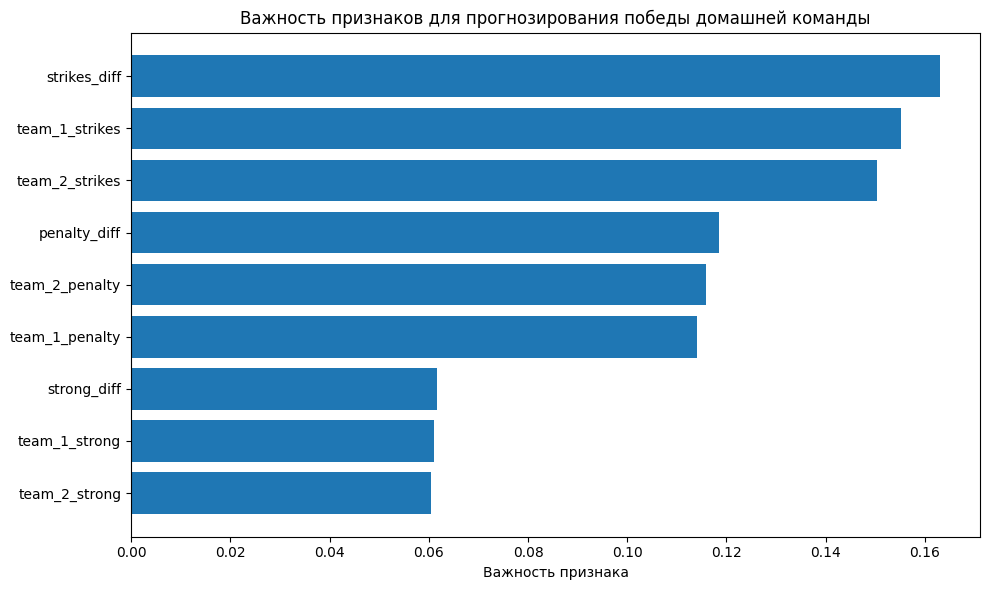

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

print("=== ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n=== RANDOM FOREST ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nВажность признаков (Random Forest):")
print(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Важность признака')
plt.title('Важность признаков для прогнозирования победы домашней команды')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
errors = X_test.copy()
errors['actual'] = y_test
errors['predicted'] = y_pred_rf
errors['correct'] = errors['actual'] == errors['predicted']

wrong_predictions = errors[~errors['correct']]
print(f"\nКоличество ошибочных предсказаний: {len(wrong_predictions)}")
print(f"Процент ошибок: {len(wrong_predictions)/len(X_test)*100:.1f}%")

if 'is_overtime' in df.columns:
    ot_games = df[df['is_overtime'] == 1]
    print(f"\n=== АНАЛИЗ МАТЧЕЙ В ОВЕРТАЙМЕ ===")
    print(f"Всего матчей в овертайме: {len(ot_games)}")
    print(f"Процент побед домашней команды в овертайме: {ot_games['team1_win'].mean()*100:.1f}%")
    
    reg_time = df[df['is_overtime'] == 0]
    print(f"\nСравнение средней разницы бросков:")
    print(f"В овертайме: {ot_games['strikes_diff'].mean():.1f}")
    print(f"В основное время: {reg_time['strikes_diff'].mean():.1f}")

print("\n" + "="*50)
print("КЛЮЧЕВЫЕ ВЫВОДЫ:")
print("="*50)
print(f"1. Домашнее преимущество: {df['team1_win'].mean()*100:.1f}% побед")
print(f"2. Самый важный показатель: {feature_importance.iloc[0]['feature']}")
print(f"3. Точность модели Random Forest: {accuracy_score(y_test, y_pred_rf)*100:.1f}%")
print(f"4. Средняя разница бросков у победившей домашней команды: {wins['strikes_diff'].mean():.1f}")
print(f"5. Средняя разница бросков у проигравшей домашней команды: {losses['strikes_diff'].mean():.1f}")


Количество ошибочных предсказаний: 598
Процент ошибок: 45.6%

=== АНАЛИЗ МАТЧЕЙ В ОВЕРТАЙМЕ ===
Всего матчей в овертайме: 933
Процент побед домашней команды в овертайме: 51.6%

Сравнение средней разницы бросков:
В овертайме: 2.4
В основное время: 1.6

КЛЮЧЕВЫЕ ВЫВОДЫ:
1. Домашнее преимущество: 54.3% побед
2. Самый важный показатель: strikes_diff
3. Точность модели Random Forest: 54.4%
4. Средняя разница бросков у победившей домашней команды: 2.9
5. Средняя разница бросков у проигравшей домашней команды: 0.4


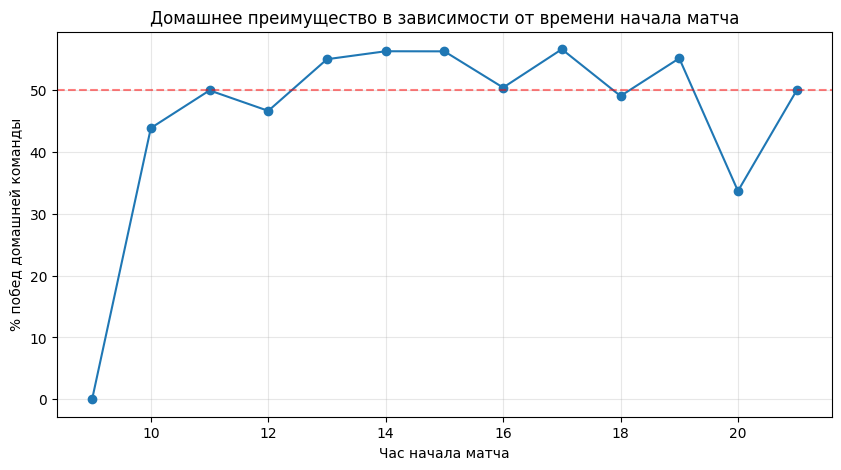


Сравнение матчей с высоким и низким количеством штрафов:
Высокие штрафы: 1597 матчей, % побед дома: 55.9%
Низкие штрафы: 1544 матчей, % побед дома: 52.7%


In [ ]:
if 'date' in df.columns:
    df['hour'] = df['date'].dt.hour
    win_rate_by_hour = df.groupby('hour')['team1_win'].mean() * 100
    
    plt.figure(figsize=(10, 5))
    plt.plot(win_rate_by_hour.index, win_rate_by_hour.values, marker='o')
    plt.axhline(y=50, color='r', linestyle='--', alpha=0.5)
    plt.xlabel('Час начала матча')
    plt.ylabel('% побед домашней команды')
    plt.title('Домашнее преимущество в зависимости от времени начала матча')
    plt.grid(True, alpha=0.3)
    plt.show()

df['total_penalty'] = df['team_1_penalty'] + df['team_2_penalty']
high_penalty = df[df['total_penalty'] > df['total_penalty'].quantile(0.75)]
low_penalty = df[df['total_penalty'] < df['total_penalty'].quantile(0.25)]

print("\nСравнение матчей с высоким и низким количеством штрафов:")
print(f"Высокие штрафы: {len(high_penalty)} матчей, % побед дома: {high_penalty['team1_win'].mean()*100:.1f}%")
print(f"Низкие штрафы: {len(low_penalty)} матчей, % побед дома: {low_penalty['team1_win'].mean()*100:.1f}%")